In [16]:
import os
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

In [17]:
rawdata_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\01_raw"
reporting_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\03_reporting" 
intermediate_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\02_intermediate"

In [18]:
## pulling raw media - sales - customer demography - cost of acq cutomers
data = pd.read_csv(f"{rawdata_loc}\\media_costs_data.csv")
data.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,...,18670,5415,3610,1,1,1,1,1,Radio,50.79


In [19]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [20]:
## sales, revenue and cost on food category, food dept., food family  (store_sales is revenue)

In [21]:
## Revenue = No. of cost per unit * no. of unit sold (cost/unit  * unit sold)

In [22]:
## Revenue Generated / food category
def revenue_generated(data):
    revenuetable = data.groupby('food_category').agg(
        Revenue=pd.NamedAgg(column='store_sales(in millions)', aggfunc='sum'),
        Cost=pd.NamedAgg(column='store_cost(in millions)', aggfunc='sum'),
        Demand=pd.NamedAgg(column='unit_sales(in millions)', aggfunc='sum')
    )
    
    # Sorting by the 'Revenue' column in descending order
    revenuetable = revenuetable.sort_values(by='Revenue', ascending=False)

    # ROI Calculation
    revenuetable['roi'] = revenuetable.Revenue / revenuetable.Cost
    
    # Reset index to keep 'food_category' as a column
    revenuetable = revenuetable.reset_index()

    return revenuetable

revenuetable_FC = revenue_generated(data=data)
revenuetable_FC

,food_category,Revenue,Cost,Demand,roi
0,Vegetables,50067.64,20059.2579,23041,2.495987
1,Snack Foods,47726.96,19115.3878,21491,2.496782
2,Dairy,25705.33,10335.8544,11825,2.487006
3,Meat,21206.17,8470.7505,9622,2.503458
4,Fruit,20134.93,8063.4484,9529,2.497062
5,Jams and Jellies,15400.78,6132.6088,7831,2.511293
6,Bread,11813.05,4728.0011,5552,2.498529
7,Breakfast Foods,11328.06,4535.8428,6025,2.497454
8,Baking Goods,11313.59,4523.1481,6037,2.501265
9,Electrical,11147.72,4477.1918,4703,2.489891


In [23]:
revenuetable_FC.to_csv(f"{intermediate_loc}//food_category_revenue.csv", index = False)

In [24]:
## Top 10 Food_Category to give us highest revenue

In [25]:
## ROI =  Revenue / Cost   (Return on Investment)

In [26]:
## Top 10 revenue generators vs Top 10 roi generators

In [27]:
# Getting Top 10 Revenue Generators
top_10_revenue = revenuetable_FC.nlargest(10, 'Revenue')

# Geting Top 10 ROI Generators
top_10_roi = revenuetable_FC.nlargest(10, 'roi')

# print(top_10_revenue, top_10_roi)  #profit = revenue - cost, per capita profit of items = demand / profit

In [28]:
top_10_revenue

,food_category,Revenue,Cost,Demand,roi
0,Vegetables,50067.64,20059.2579,23041,2.495987
1,Snack Foods,47726.96,19115.3878,21491,2.496782
2,Dairy,25705.33,10335.8544,11825,2.487006
3,Meat,21206.17,8470.7505,9622,2.503458
4,Fruit,20134.93,8063.4484,9529,2.497062
5,Jams and Jellies,15400.78,6132.6088,7831,2.511293
6,Bread,11813.05,4728.0011,5552,2.498529
7,Breakfast Foods,11328.06,4535.8428,6025,2.497454
8,Baking Goods,11313.59,4523.1481,6037,2.501265
9,Electrical,11147.72,4477.1918,4703,2.489891


In [29]:
top_10_roi

,food_category,Revenue,Cost,Demand,roi
39,Canned Clams,1274.46,497.0866,630,2.563859
25,Plastic Products,4622.67,1825.9742,1808,2.531618
26,Carbonated Beverages,4467.83,1773.1219,2427,2.519753
44,Canned Sardines,868.28,345.6828,534,2.511782
5,Jams and Jellies,15400.78,6132.6088,7831,2.511293
33,Seafood,2470.42,984.0403,1164,2.510487
34,Canned Tuna,2320.84,925.1180,1207,2.508696
30,Frozen Entrees,4183.06,1669.8595,1857,2.505037
16,Starchy Foods,7790.06,3110.1617,3433,2.504712
42,Canned Oysters,1165.60,465.5039,568,2.503953


In [30]:
top_10_roi.to_csv(f"{intermediate_loc}//food_category_revenue_top10.csv", index = False)

Observation: 
     From the revenue table of the food_category above, it is clear that that the top 10 revenue generators of the Business might not be the top 10 ROI generators fo the business. There could be a case where this observation could be due to the customer demands in the area of demography

In [36]:
## Exploring the cost vs Revenue of the inverted pyramidal structure of the Food Category - Department - Family:

def revenue_generated(data, col_names):

    revenuetable = data.groupby(col_names).agg(Revenue = pd.NamedAgg('store_sales(in millions)', 'sum'),
                                                     Cost = pd.NamedAgg('store_cost(in millions)', 'sum'),
                                                     Demand = pd.NamedAgg('unit_sales(in millions)', 'sum'))
    revenuetable = revenuetable.sort_values(by='Revenue', ascending=False).reset_index()
    revenuetable['roi'] = revenuetable.Revenue/revenuetable.Cost
    
    return revenuetable

revenuetable_FD = revenue_generated(data = data, col_names = 'food_department')
revenuetable_FD

,food_department,Revenue,Cost,Demand,roi
0,Produce,56914.58,22787.2701,26361,2.497648
1,Snack Foods,47726.96,19115.3878,21491,2.496782
2,Household,42579.56,17043.4544,19089,2.498294
3,Frozen Foods,39055.11,15647.3022,18909,2.495964
4,Canned Foods,27085.84,10876.5089,13079,2.490306
5,Baking Goods,26714.37,10655.7569,13868,2.507036
6,Dairy,25705.33,10335.8544,11825,2.487006
7,Health and Hygiene,23860.63,9577.4205,11767,2.491342
8,Beverages,19003.40,7591.0691,9324,2.503389
9,Deli,18068.32,7217.5224,8638,2.503396


In [37]:
# Getting Top 10 Revenue Generators
top_10_revenue_FD = revenuetable_FD.nlargest(10, 'Revenue')

# Geting Top 10 ROI Generators
top_10_roi_FD = revenuetable_FD.nlargest(10, 'roi')

In [38]:
top_10_revenue_FD

,food_department,Revenue,Cost,Demand,roi
0,Produce,56914.58,22787.2701,26361,2.497648
1,Snack Foods,47726.96,19115.3878,21491,2.496782
2,Household,42579.56,17043.4544,19089,2.498294
3,Frozen Foods,39055.11,15647.3022,18909,2.495964
4,Canned Foods,27085.84,10876.5089,13079,2.490306
5,Baking Goods,26714.37,10655.7569,13868,2.507036
6,Dairy,25705.33,10335.8544,11825,2.487006
7,Health and Hygiene,23860.63,9577.4205,11767,2.491342
8,Beverages,19003.40,7591.0691,9324,2.503389
9,Deli,18068.32,7217.5224,8638,2.503396


In [39]:
top_10_roi_FD

,food_department,Revenue,Cost,Demand,roi
18,Meat,2486.86,984.3473,1199,2.526405
19,Seafood,2470.42,984.0403,1164,2.510487
5,Baking Goods,26714.37,10655.7569,13868,2.507036
13,Starchy Foods,7790.06,3110.1617,3433,2.504712
9,Deli,18068.32,7217.5224,8638,2.503396
8,Beverages,19003.40,7591.0691,9324,2.503389
14,Eggs,6398.62,2558.0635,2926,2.501353
11,Snacks,10141.97,4056.9256,4822,2.499915
10,Baked Goods,11813.05,4728.0011,5552,2.498529
2,Household,42579.56,17043.4544,19089,2.498294


In [40]:
top_10_roi_FD.to_csv(f"{intermediate_loc}//food_department_revenue.csv", index = False)

In [159]:
## food family
revenuetable_FF = revenue_generated(data = data, col_names = 'food_family')
revenuetable_FF

,Revenue,Cost,Demand,roi
food_family,,,,
Food,284614.54,113970.3556,133901,2.497268
Non-Consumable,76468.46,30650.1962,35714,2.494877
Drink,34178.40,13668.1469,17299,2.500588


In [160]:
## top 10 revenue generators vs top 10 roi generators

In [161]:
# Getting Top 10 Revenue Generators
top_10_revenue = revenuetable_FF.nlargest(10, 'Revenue')

# Geting Top 10 ROI Generators
top_10_roi = revenuetable_FF.nlargest(10, 'roi')

In [162]:
top_10_revenue

,Revenue,Cost,Demand,roi
food_family,,,,
Food,284614.54,113970.3556,133901,2.497268
Non-Consumable,76468.46,30650.1962,35714,2.494877
Drink,34178.40,13668.1469,17299,2.500588


In [163]:
top_10_roi

,Revenue,Cost,Demand,roi
food_family,,,,
Drink,34178.40,13668.1469,17299,2.500588
Food,284614.54,113970.3556,133901,2.497268
Non-Consumable,76468.46,30650.1962,35714,2.494877


In [164]:
## Reevenue - Demand across all 3 lines of food family

revenueline = data.groupby(['food_family', 'food_department', 'food_category']).agg(Revenue = pd.NamedAgg('store_sales(in millions)', 'sum'),
                                                     Cost = pd.NamedAgg('store_cost(in millions)', 'sum'),
                                                     Demand = pd.NamedAgg('unit_sales(in millions)', 'sum'))
revenueline = revenueline.sort_values(by='Revenue', ascending=False)
revenueline['roi'] = revenueline.Revenue/revenueline.Cost
revenueline

Revenue        Cost  \
food_family    food_department     food_category                                
Food           Snack Foods         Snack Foods           47726.96  19115.3878   
               Produce             Vegetables            31777.87  12722.8269   
               Dairy               Dairy                 20626.94   8307.3254   
               Produce             Fruit                 17863.05   7146.6596   
               Baking Goods        Jams and Jellies      15400.78   6132.6088   
               Deli                Meat                  14710.30   5865.9227   
               Baked Goods         Bread                 11813.05   4728.0011   
               Baking Goods        Baking Goods          11313.59   4523.1481   
Non-Consumable Household           Electrical            11147.72   4477.1918   
                                   Paper Products        10767.78   4304.3053   
Food           Canned Foods        Canned Soup           10419.14   4190.5216   
               Frozen Foods        Vegetables            10365.33   4155.1374   
               Snacks              Candy                 10141.97   4056.9256   
Drink          Alcoholic Beverages Beer and Wine         10096.61   4048.5488   
Food           Frozen Foods        Frozen Desserts        9329.26   3735.1895   
Non-Consumable Health and Hygiene  Bathroom Products      8549.83   3423.6980   
Food           Canned Foods        Vegetables             7924.44   3181.2936   
               Starchy Foods       Starchy Foods          7790.06   3110.1617   
Non-Consumable Household           Kitchen Products       6823.04   2728.9778   
               Health and Hygiene  Pain Relievers         6511.23   2621.3690   
Food           Eggs                Eggs                   6398.62   2558.0635   
               Frozen Foods        Breakfast Foods        6278.50   2510.8892   
Non-Consumable Periodicals         Magazines              6207.53   2490.2450   
Food           Produce             Specialty              6093.29   2443.0965   
Drink          Beverages           Hot Beverages          5856.23   2342.0334   
               Dairy               Dairy                  5078.39   2028.5290   
Food           Breakfast Foods     Breakfast Foods        5049.56   2024.9536   
               Frozen Foods        Pizza                  4889.95   1955.7461   
Non-Consumable Household           Cleaning Supplies      4729.24   1907.0914   
                                   Plastic Products       4622.67   1825.9742   
Drink          Beverages           Carbonated Beverages   4467.83   1773.1219   
                                   Pure Juice Beverages   4458.40   1783.0764   
Non-Consumable Health and Hygiene  Hygiene                4445.85   1784.4037   
Drink          Beverages           Drinks                 4220.94   1692.8374   
Food           Frozen Foods        Frozen Entrees         4183.06   1669.8595   
                                   Meat                   4009.01   1620.4805   
               Deli                Side Dishes            3358.02   1351.5997   
Non-Consumable Household           Hardware               2649.06   1059.2678   
Food           Meat                Meat                   2486.86    984.3473   
               Seafood             Seafood                2470.42    984.0403   
               Canned Foods        Canned Tuna            2320.84    925.1180   
               Canned Products     Fruit                  2271.88    916.7888   
Non-Consumable Health and Hygiene  Cold Remedies          2184.32    880.3907   
                                   Decongestants          2169.40    867.5591   
Food           Canned Foods        Canned Anchovies       1664.65    672.6467   
                                   Canned Shrimp          1448.43    598.6557   
Non-Consumable Carousel            Specialty              1300.86    523.1877   
Food           Canned Foods        Canned Clams           1274.46    497.0866   
Non-Cons

## Correlation Study:
We need to understand and investigate the linear trends and associations between all the numeric co-variates and our response variable

In [165]:
## Step 1: Code to create a list of variables from the above dataframe that contains numeric entries

num_cols = data.select_dtypes(include=['number']).columns.tolist()

## Step 2: Code to calculate the co-relation matrix out of the list of numeric vectors in the dataframe

abs_corr_mat = data[num_cols].corr().abs()
# abs_corr_mat

## Step 3: Transform the absolute correlation matrix above to a table which compares the correlation of the response variable with all other variables in a longer format

#pivot_longer ## to use(check)
response_var = 'cost'
corr_table = (
            abs_corr_mat[[response_var]]
            .drop(response_var)  ## Exclude correlation of response with itself
            .reset_index()  ## Reset index to make it tidy
            .rename(columns={'index': 'Variable', response_var : 'Correlation'})  ## Rename for clarity
)
corr_table.sort_values('Correlation', ascending = False)

,Variable,Correlation
18,video_store,0.111214
20,prepared_food,0.095596
19,salad_bar,0.095596
21,florist,0.087340
17,coffee_bar,0.060859
15,frozen_sqft,0.047971
16,meat_sqft,0.047962
13,store_sqft,0.039656
14,grocery_sqft,0.025108
2,unit_sales(in millions),0.015015


## Inference: Correlation Study

Based on the above long form correlation table with our response variable 'cost'. It is clear to ask that the linear association between them is close to 0. Hence, we should explore non-linear techniques for predicting the cost of Accq customers.

In [166]:
## Step 1: Code to create a list of variables from the above dataframe that contains categorical entries

cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

## Variance Study of Cost of A11 Customers X Promotion Name

We want to understand and viz the spread of the cost over the difference promotion name.

In [167]:
data.promotion_name.nunique()  ## This gives us the number of unique promotion names

49

In [168]:
promo_dist = data.groupby(['promotion_name']).agg(Mean = pd.NamedAgg('cost', 'mean'),
                                                     Variance = pd.NamedAgg('cost', 'var'),
                                                     Obs = pd.NamedAgg('promotion_name', 'count'),
                                                     Min = pd.NamedAgg('cost', 'min'),
                                                     Max = pd.NamedAgg('cost', 'max')).reset_index()
promo_dist = promo_dist.sort_values(by='Variance', ascending=False)
## promo_dist.Variance.median()
promo_dist

,promotion_name,Mean,Variance,Obs,Min,Max
14,Free For All,105.877051,1475.950566,1621,52.06,148.87
23,Pick Your Savings,101.718813,1453.853144,876,56.49,147.17
7,Coupon Spectacular,97.340647,1315.935880,402,51.47,145.31
39,Super Savers,114.039731,1215.978606,1930,64.76,144.54
4,Big Time Savings,106.383007,1209.183257,745,53.45,135.80
5,Bye Bye Baby,103.677071,1195.681204,874,58.16,141.39
25,Price Destroyers,111.700997,1145.925220,1374,58.27,148.62
32,Sales Galore,121.205833,1013.799405,1212,62.40,149.08
11,Double Down Sale,80.373311,941.363550,1755,50.79,142.71
42,Tip Top Savings,96.935835,938.203675,862,54.90,142.58


In [212]:
promo_dist.to_csv(f"{intermediate_loc}//promotions_revenue.csv", index = False)

## Now extracting the promotional names based on the variance of the cost of aqquaring the customers if the variance of the cost under a promotional name is higher than ths other then this implies that the respective promotion had varying cost for aqq the customers. Hence, let us the extract the promotion names that has variance higher than the median

In [169]:
promo_dist.Variance.median()

613.9548388299912

In [170]:
filtered_promos = promo_dist[promo_dist['Variance'] >= promo_dist['Variance'].median()].promotion_name.tolist()

filtered_promos

['Free For All',
 'Pick Your Savings',
 'Coupon Spectacular',
 'Super Savers',
 'Big Time Savings',
 'Bye Bye Baby',
 'Price Destroyers',
 'Sales Galore',
 'Double Down Sale',
 'Tip Top Savings',
 'Weekend Markdown',
 'Big Time Discounts',
 'Best Savings',
 'Mystery Sale',
 'Big Promo',
 'One Day Sale',
 'Unbeatable Price Savers',
 'Green Light Days',
 'Save-It Sale',
 'Super Duper Savers',
 'Savings Galore',
 'Price Cutters',
 'You Save Days',
 'Cash Register Lottery',
 'Bag Stuffers']

In [171]:
## H/W: for all promotional campaign to find the box plot

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

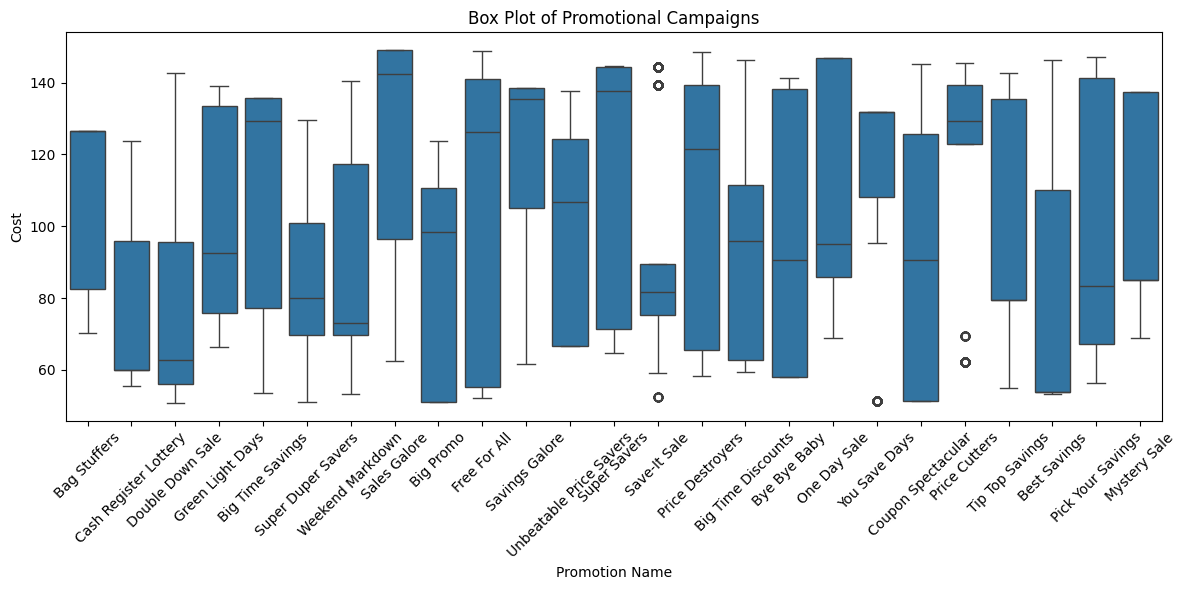

In [173]:
# Filter the original dataset to include only the filtered promotions
filtered_data = data[data['promotion_name'].isin(filtered_promos)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='promotion_name', y='cost', data=filtered_data)
plt.title('Box Plot of Promotional Campaigns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Promotion Name')
plt.ylabel('Cost')
plt.tight_layout()

# Show the plot
plt.show()

## Inference:

From the above boxplot(s) it is obvious that the variance offered by these promotional campaigns are higher compared to the other ones and if we trace the localization of the medians of these campaigns then it becomes clear that there are some campaigns that had a lot higher cost of aqq the customers compared to the other campaigns. This insight will enable us to nunderstand that these campaigns can offer a good signal to our ML model if they can be transformed as features and expand our feature space

In [174]:
#filtered_promos = pd.DataFrame({"promo_campaigns" : filtered_promos})
#filtered_promos.to_csv(f"{intermediate_loc}//promotions_shortisted.csv", index = False)

## Demographic Analysis

Let us try to understand the influence of customer demography over the cost of aqq customers.

In [175]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [176]:
## To check if the two columns for average cars at home are identical or not without statistical measures

sum(data['avg_cars_at home(approx)'] == data['avg_cars_at home(approx).1']) == data.shape[0]

True

In [177]:
## List of demographic columns:
## This list of features conatins features that add to the customer demography and their experience shopping

custdemo = ['marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
            'avg. yearly_income', 'num_children_at_home', 'store_type', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 
            'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'media_type']

In [178]:
## Extract customer data using the list above

custdata = data[custdemo]
custdata.head()

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_type,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,media_type
0,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,Deluxe Supermarket,27694,18670,5415,3610,1,1,1,1,"Daily Paper, Radio"
1,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,Deluxe Supermarket,27694,18670,5415,3610,1,1,1,1,"Daily Paper, Radio"
2,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,Deluxe Supermarket,27694,18670,5415,3610,1,1,1,1,"Daily Paper, Radio"
3,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,Deluxe Supermarket,27694,18670,5415,3610,1,1,1,1,In-Store Coupon
4,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,Deluxe Supermarket,27694,18670,5415,3610,1,1,1,1,Radio


In [179]:
custdata.dtypes

marital_status              object
gender                      object
total_children               int64
education                   object
member_card                 object
occupation                  object
houseowner                  object
avg_cars_at home(approx)     int64
avg. yearly_income          object
num_children_at_home         int64
store_type                  object
store_sqft                   int64
grocery_sqft                 int64
frozen_sqft                  int64
meat_sqft                    int64
coffee_bar                   int64
video_store                  int64
salad_bar                    int64
prepared_food                int64
media_type                  object
dtype: object

## Creating customer level Personas based on Customer Demography and Customer Experience

As we donot have any customer level ID, attached to the data it would be wise to gather similar customers under one umbrella and create personas out of them. Then using the persona tags we can insert them as the type of customers in the data for further predictions

## R&D :: Clustering - kprototype

In [180]:
#pip install kmodes

In [181]:
# Separate categorical and numerical column indices
#cat_cols = ['marital_status', 'gender', 'education','member_card', 'occupation', 'houseowner','avg. yearly_income','store_type','media_type']
#categorical_indices = [custdata.columns.get_loc(col) for col in cat_cols]

# Function to calculate the cost for different k values
#def calculate_costs(data, categorical_indices, max_k):
#    costs = []
#    for k in range(1, max_k + 1):
#        kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#        clusters = kproto.fit_predict(data, categorical = categorical_indices)
#        costs.append(kproto.cost_)
#    return costs

# Define the maximum number of clusters to try
#max_k = 10

# Calculate the costs for k-values
#costs = calculate_costs(custdata, categorical_indices, max_k)

In [182]:
# Separate categorical and numerical column indices
#cat_cols = ['marital_status', 'gender', 'education', 'member_card', 
#            'occupation', 'houseowner', 'avg. yearly_income', 
#            'store_type', 'media_type']
#categorical_indices = [custdata.columns.get_loc(col) for col in cat_cols]

# Function to calculate the cost for different k values
#def calculate_costs(data, categorical_indices, max_k):
#    costs = []
#    for k in range(1, max_k + 1):
#        kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#        clusters = kproto.fit_predict(data, categorical=categorical_indices)
#        costs.append(kproto.cost_)
#    return costs

# Sample the data to reduce the size for computation
#sampled_data = custdata.sample(frac=0.1, random_state=42)  # Taking 10% of the data

# Define the maximum number of clusters to try
#max_k = 10

# Calculate the costs for k-values using sampled data
#costs = calculate_costs(sampled_data.values, categorical_indices, max_k)

In [183]:
# Separate categorical and numerical column indices
#cat_cols = ['marital_status', 'gender', 'education', 'member_card', 
#            'occupation', 'houseowner', 'avg. yearly_income', 
#            'store_type', 'media_type']
#categorical_indices = [custdata.columns.get_loc(col) for col in cat_cols]

# Function to calculate the cost for different k values
#def calculate_costs(data, categorical_indices, max_k):
#    costs = []
#    for k in range(1, max_k + 1):
#        print(f"investigating for the value of k = {k}")
        
#        try:
#            kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#            clusters = kproto.fit_predict(data, categorical=categorical_indices)
#            costs.append(kproto.cost_)
#        except ValueError as e:
#            print(f"Error for k={k}: {e}")
#            break
#    return costs

# Sample the data to reduce the size for computation
#sampled_data = custdata.sample(frac=0.2, random_state=42)  # Increase sample size to 20%

# Ensure max_k is not greater than the number of samples
#max_k = min(4, len(sampled_data))

# Calculate the costs for k-values using sampled data
#costs = calculate_costs(sampled_data, categorical_indices, max_k)

In [184]:
#costs

In [44]:
# Plot the elbow method graph
#plt.figure(figsize=(8, 5))
#plt.plot(range(1, max_k + 1), costs, marker='o')
#plt.title('Elbow Method for Optimal K in K-Prototypes Clustering')
#plt.xlabel('Number of Clusters (k)')
#plt.ylabel('Cost')
#plt.grid()
#plt.show()

In [45]:
# Separate categorical and numerical column indices
cat_cols = ['marital_status', 'gender', 'education', 'member_card', 
            'occupation', 'houseowner', 'avg. yearly_income', 
            'store_type', 'media_type']
categorical_indices = [custdata.columns.get_loc(col) for col in cat_cols]

# Function to calculate the cost for different k values
def calculate_costs(data, categorical_indices, max_k):
    costs = []
    for k in range(1, max_k + 1):
        print(f"investigating for the value of k = {k}")
        
        try:
            kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
            clusters = kproto.fit_predict(data, categorical=categorical_indices)
            costs.append(kproto.cost_)
        except ValueError as e:
            print(f"Error for k={k}: {e}")
            break
    return costs

# Sample the data to reduce the size for computation
#sampled_data = custdata.sample(frac=0.2, random_state=42)  # Increase sample size to 20%

# Ensure max_k is not greater than the number of samples
max_k = 7

# Calculate the costs for k-values using sampled data
costs = calculate_costs(custdata, categorical_indices, max_k)

investigating for the value of k = 1
investigating for the value of k = 2
investigating for the value of k = 3
investigating for the value of k = 4
investigating for the value of k = 5
investigating for the value of k = 6
investigating for the value of k = 7


In [46]:
costs

[3141656444314.7983,
 865540874772.9497,
 444793494643.00104,
 356538727333.1165,
 280976666020.36847,
 222780190531.4961,
 137636024198.43048]

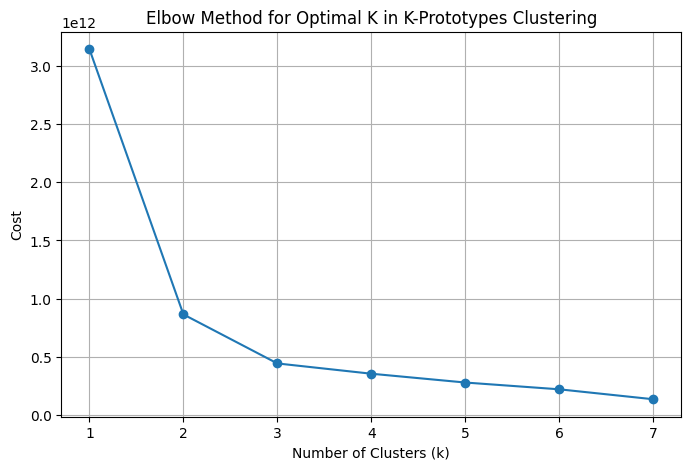

In [47]:
# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), costs, marker='o')
plt.title('Elbow Method for Optimal K in K-Prototypes Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.grid()
plt.show()

Elbow is starting at 3 as its bending from there

In [185]:
# Separate categorical and numerical column indices
cat_cols = ['marital_status', 'gender', 'education', 'member_card', 
            'occupation', 'houseowner', 'avg. yearly_income', 
            'store_type', 'media_type']
categorical_indices = [custdata.columns.get_loc(col) for col in cat_cols]

# Function to calculate the cost for different k values
def run_kprototype_cluster(data, categorical_indices, k):
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(data, categorical=categorical_indices)
    custdata['cluster'] = clusters
    return custdata

# Calculate the costs for k-values using sampled data
cluster_data = run_kprototype_cluster(custdata, categorical_indices, 3)
cluster_data

C:\Users\hp\AppData\Local\Temp\ipykernel_14560\3908974907.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custdata['cluster'] = clusters


,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,media_type,cluster
0,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,...,27694,18670,5415,3610,1,1,1,1,"Daily Paper, Radio",0
1,M,M,0,Bachelors Degree,Silver,Professional,Y,4,$50K - $70K,0,...,27694,18670,5415,3610,1,1,1,1,"Daily Paper, Radio",0
2,S,F,4,Partial High School,Normal,Manual,N,1,$10K - $30K,0,...,27694,18670,5415,3610,1,1,1,1,"Daily Paper, Radio",0
3,M,F,2,High School Degree,Bronze,Manual,Y,2,$30K - $50K,2,...,27694,18670,5415,3610,1,1,1,1,In-Store Coupon,0
4,M,M,0,Partial High School,Bronze,Skilled Manual,N,2,$30K - $50K,0,...,27694,18670,5415,3610,1,1,1,1,Radio,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,M,F,1,Partial High School,Normal,Skilled Manual,Y,1,$10K - $30K,1,...,22478,15321,4294,2863,1,0,0,0,In-Store Coupon,2
60424,S,F,2,High School Degree,Bronze,Skilled Manual,N,2,$30K - $50K,0,...,22478,15321,4294,2863,1,0,0,0,Sunday Paper,2
60425,M,M,1,High School Degree,Bronze,Manual,Y,3,$30K - $50K,0,...,22478,15321,4294,2863,1,0,0,0,"Sunday Paper, Radio, TV",2
60426,S,M,2,Bachelors Degree,Bronze,Professional,N,4,$70K - $90K,0,...,34452,27463,4193,2795,1,0,0,0,Sunday Paper,1


In [94]:
## Customer Data Profiling

In [186]:
# Find the number of observations in each cluster
cluster_counts = cluster_data['cluster'].value_counts()/cluster_data.shape[0]

# Display the cluster counts
print(cluster_counts)

cluster
2    0.443106
0    0.314920
1    0.241974
Name: count, dtype: float64


In [187]:
## Re-attaching the cluster tags from our k-prototype clustering onto our actual data.

data['cluster_tag'] = custdata['cluster']
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,cluster_tag
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62,0
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86,0
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16,0
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,5415,3610,1,1,1,1,1,In-Store Coupon,95.78,0
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,...,5415,3610,1,1,1,1,1,Radio,50.79,0


In [194]:
data.to_csv(f"{intermediate_loc}//cluster_tag_data.csv", index = False)

In [188]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost', 'cluster_tag'],
      dtype='object')

In [ ]:
## customer broad profile
## Now let us create a broader profile of the clusters based on the information coming from the main data

## 1) For a given cluster(0,1 or 2) number of food categories, food department, food family
## 2) For a given cluster avg. store sales, min store sales, max store sales
## 3) For a given cluster avg. store cost, min store cost, max store cost
## 4) For a given cluster number of unique promotion names
## 5) For a given cluster number of unique house owners and non-unique house owners
## 6) For a given cluster min avg. yearly income, max avg. yearly income
## 7) For a given cluster tag min. number of children at home and max number of children at home
## 8) For a given cluster min and max of avg. cars at home
## 9) For a given cluster min SRP, max SRP and avg. SRP
## 10) For a given cluster min and max store_sqft, 'grocery_sqft', 'frozen_sqft', 'meat_sqft'
## 11) For a given cluster tag min and max of 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'
## 12) For a given cluster tag number of unique media_type 
## 13) For a give cluster tag min and max cost

In [ ]:
'food_category', 'food_department', 'food_family', 'store_sales(in millions)', 'store_cost(in millions)', 'promotion_name', 'houseowner', 
'avg. yearly_income', 'num_children_at_home', 'avg_cars_at home(approx)', 'SRP', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 
'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost'

In [140]:
# Group by cluster and compute required statistics
cluster_summary = data.groupby('cluster_tag').agg(
    # 1. Number of unique food categories, food departments, food families
    num_food_categories=('food_category', 'nunique'),
    num_food_departments=('food_department', 'nunique'),
    num_food_families=('food_family', 'nunique'),

    # 2. Store sales statistics
    avg_store_sales=('store_sales(in millions)', 'mean'),
    min_store_sales=('store_sales(in millions)', 'min'),
    max_store_sales=('store_sales(in millions)', 'max'),

    # 3. Store cost statistics
    avg_store_cost=('store_cost(in millions)', 'mean'),
    min_store_cost=('store_cost(in millions)', 'min'),
    max_store_cost=('store_cost(in millions)', 'max'),

    # 4. Unique promotion names
    unique_promotions=('promotion_name', 'nunique'),

    # 5. Unique and non-unique house owners
    unique_houseowners=('houseowner', 'nunique'),
    total_houseowners=('houseowner', 'count'),

    # 6. Min and max avg. yearly income
    min_avg_yearly_income=('avg. yearly_income', 'min'),
    max_avg_yearly_income=('avg. yearly_income', 'max'),

    # 7. Min and max number of children at home
    min_children_at_home=('num_children_at_home', 'min'),
    max_children_at_home=('num_children_at_home', 'max'),

    # 8. Min and max avg. cars at home
    min_avg_cars_at_home=('avg_cars_at home(approx)', 'min'),
    max_avg_cars_at_home=('avg_cars_at home(approx)', 'max'),

    # 9. Min, max, and avg SRP
    min_SRP=('SRP', 'min'),
    max_SRP=('SRP', 'max'),
    avg_SRP=('SRP', 'mean'),

    # 10. Min and max for store_sqft, grocery_sqft, frozen_sqft, meat_sqft
    min_store_sqft=('store_sqft', 'min'),
    max_store_sqft=('store_sqft', 'max'),
    min_grocery_sqft=('grocery_sqft', 'min'),
    max_grocery_sqft=('grocery_sqft', 'max'),
    min_frozen_sqft=('frozen_sqft', 'min'),
    max_frozen_sqft=('frozen_sqft', 'max'),
    min_meat_sqft=('meat_sqft', 'min'),
    max_meat_sqft=('meat_sqft', 'max'),

    # 11. Min and max for coffee_bar, video_store, salad_bar, prepared_food, florist
    min_coffee_bar=('coffee_bar', 'min'),
    max_coffee_bar=('coffee_bar', 'max'),
    min_video_store=('video_store', 'min'),
    max_video_store=('video_store', 'max'),
    min_salad_bar=('salad_bar', 'min'),
    max_salad_bar=('salad_bar', 'max'),
    min_prepared_food=('prepared_food', 'min'),
    max_prepared_food=('prepared_food', 'max'),
    min_florist=('florist', 'min'),
    max_florist=('florist', 'max'),

    # 12. Unique media types
    unique_media_types=('media_type', 'nunique'),

    # 13. Min and max cost
    min_cost=('cost', 'min'),
    max_cost=('cost', 'max')
)
cluster_summary

,num_food_categories,num_food_departments,num_food_families,avg_store_sales,min_store_sales,max_store_sales,avg_store_cost,min_store_cost,max_store_cost,unique_promotions,...,max_video_store,min_salad_bar,max_salad_bar,min_prepared_food,max_prepared_food,min_florist,max_florist,unique_media_types,min_cost,max_cost
cluster_tag,,,,,,,,,,,,,,,,,,,,,
0,45,22,3,6.512920,0.52,19.90,2.609442,0.1705,9.0160,38,...,1,0,1,0,1,0,1,13,50.79,148.62
1,45,22,3,6.647975,1.00,19.90,2.668402,0.3060,9.5305,39,...,0,0,1,0,1,0,1,13,51.12,149.08
2,45,22,3,6.502609,0.51,22.92,2.599852,0.1632,9.7265,48,...,1,0,1,0,1,0,1,13,51.00,149.75


In [189]:
# Group by cluster_tag and compute required statistics using NamedAgg
cluster_summary = data.groupby('cluster_tag').agg(
    # 1. Number of unique food categories, food departments, food families
    num_food_categories=pd.NamedAgg(column='food_category', aggfunc='nunique'),
    num_food_departments=pd.NamedAgg(column='food_department', aggfunc='nunique'),
    num_food_families=pd.NamedAgg(column='food_family', aggfunc='nunique'),

    # 2. Store sales statistics
    avg_store_sales=pd.NamedAgg(column='store_sales(in millions)', aggfunc='mean'),
    min_store_sales=pd.NamedAgg(column='store_sales(in millions)', aggfunc='min'),
    max_store_sales=pd.NamedAgg(column='store_sales(in millions)', aggfunc='max'),

    # 3. Store cost statistics
    avg_store_cost=pd.NamedAgg(column='store_cost(in millions)', aggfunc='mean'),
    min_store_cost=pd.NamedAgg(column='store_cost(in millions)', aggfunc='min'),
    max_store_cost=pd.NamedAgg(column='store_cost(in millions)', aggfunc='max'),

    # 4. Unique promotion names
    unique_promotions=pd.NamedAgg(column='promotion_name', aggfunc='nunique'),

    # 5. Unique and non-unique house owners
    unique_houseowners=pd.NamedAgg(column='houseowner', aggfunc='nunique'),
    total_houseowners=pd.NamedAgg(column='houseowner', aggfunc='count'),

    # 6. Min and max avg. yearly income
    min_avg_yearly_income=pd.NamedAgg(column='avg. yearly_income', aggfunc='min'),
    max_avg_yearly_income=pd.NamedAgg(column='avg. yearly_income', aggfunc='max'),

    # 7. Min and max number of children at home
    min_children_at_home=pd.NamedAgg(column='num_children_at_home', aggfunc='min'),
    max_children_at_home=pd.NamedAgg(column='num_children_at_home', aggfunc='max'),

    # 8. Min and max avg. cars at home
    min_avg_cars_at_home=pd.NamedAgg(column='avg_cars_at home(approx)', aggfunc='min'),
    max_avg_cars_at_home=pd.NamedAgg(column='avg_cars_at home(approx)', aggfunc='max'),

    # 9. Min, max, and avg SRP
    min_SRP=pd.NamedAgg(column='SRP', aggfunc='min'),
    max_SRP=pd.NamedAgg(column='SRP', aggfunc='max'),
    avg_SRP=pd.NamedAgg(column='SRP', aggfunc='mean'),

    # 10. Min and max for store_sqft, grocery_sqft, frozen_sqft, meat_sqft
    min_store_sqft=pd.NamedAgg(column='store_sqft', aggfunc='min'),
    max_store_sqft=pd.NamedAgg(column='store_sqft', aggfunc='max'),
    min_grocery_sqft=pd.NamedAgg(column='grocery_sqft', aggfunc='min'),
    max_grocery_sqft=pd.NamedAgg(column='grocery_sqft', aggfunc='max'),
    min_frozen_sqft=pd.NamedAgg(column='frozen_sqft', aggfunc='min'),
    max_frozen_sqft=pd.NamedAgg(column='frozen_sqft', aggfunc='max'),
    min_meat_sqft=pd.NamedAgg(column='meat_sqft', aggfunc='min'),
    max_meat_sqft=pd.NamedAgg(column='meat_sqft', aggfunc='max'),

    # 11. Min and max for coffee_bar, video_store, salad_bar, prepared_food, florist
    min_coffee_bar=pd.NamedAgg(column='coffee_bar', aggfunc='min'),
    max_coffee_bar=pd.NamedAgg(column='coffee_bar', aggfunc='max'),
    min_video_store=pd.NamedAgg(column='video_store', aggfunc='min'),
    max_video_store=pd.NamedAgg(column='video_store', aggfunc='max'),
    min_salad_bar=pd.NamedAgg(column='salad_bar', aggfunc='min'),
    max_salad_bar=pd.NamedAgg(column='salad_bar', aggfunc='max'),
    min_prepared_food=pd.NamedAgg(column='prepared_food', aggfunc='min'),
    max_prepared_food=pd.NamedAgg(column='prepared_food', aggfunc='max'),
    min_florist=pd.NamedAgg(column='florist', aggfunc='min'),
    max_florist=pd.NamedAgg(column='florist', aggfunc='max'),

    # 12. Unique media types
    unique_media_types=pd.NamedAgg(column='media_type', aggfunc='nunique'),

    # 13. Min and max cost
    min_cost=pd.NamedAgg(column='cost', aggfunc='min'),
    max_cost=pd.NamedAgg(column='cost', aggfunc='max')
).reset_index()

cluster_summary

,cluster_tag,num_food_categories,num_food_departments,num_food_families,avg_store_sales,min_store_sales,max_store_sales,avg_store_cost,min_store_cost,max_store_cost,...,max_video_store,min_salad_bar,max_salad_bar,min_prepared_food,max_prepared_food,min_florist,max_florist,unique_media_types,min_cost,max_cost
0,0,45,22,3,6.512920,0.52,19.90,2.609442,0.1705,9.0160,...,1,0,1,0,1,0,1,13,50.79,148.62
1,1,45,22,3,6.647975,1.00,19.90,2.668402,0.3060,9.5305,...,0,0,1,0,1,0,1,13,51.12,149.08
2,2,45,22,3,6.502609,0.51,22.92,2.599852,0.1632,9.7265,...,1,0,1,0,1,0,1,13,51.00,149.75


In [190]:
cluster_summary.to_csv(f"{reporting_loc}//cluster_summary.csv", index = False)
## To do it in excel format and color code it and not in csv

In [ ]:
## Observation:
#